In [8]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #
from sklearn.model_selection import train_test_split
from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

print("Comenzo la carga...")
#train_req = pd.read_excel("train_requerimientos.xlsx")
train_cliente = pd.read_excel("train_clientes.xlsx")
#test_cliente = pd.read_excel('test_clientes.xlsx')
#test_req = pd.read_excel('test_requerimientos.xlsx') 
print ("Termino de cargar...")

Comenzo la carga...
Termino de cargar...
Wall time: 34.1 s


### Enlaces
* https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column
* https://datascience.stackexchange.com/questions/20308/how-to-sum-values-grouped-by-two-columns-in-pandas
* https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

In [9]:
print (train_cliente.columns)
#print (train_req.columns)
print ("*******")
#print (test_cliente.columns)
#print (test_req.columns)

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'ATTRITION',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CAN

In [10]:
#[train["ATTRITION"]==1]
#'ANTIGUEDAD','EDAD','SDO_ACTIVO_MENOS0','FLG_SEGURO_MENOS0','FLG_NOMINA','NRO_ENTID_SSFF_MENOS0','FLG_SDO_OTSSFF_MENOS0'
#X_train=train[['FLG_BANCARIZADO','ANTIGUEDAD','EDAD','SDO_ACTIVO_MENOS0','FLG_SEGURO_MENOS0','FLG_NOMINA','NRO_ENTID_SSFF_MENOS0','%no_reclamos',"%no_solicitudes"]]
#X_train=X_train.fillna(X_train.mean()[['ANTIGUEDAD','EDAD']])
#Y_train =train['ATTRITION']
#print (X_train.shape)
#print (Y_train.shape)
#X_train_np=X_train.as_matrix(columns=None)
#Y_train_np=Y_train.as_matrix(columns=None)

(70000, 9)
(70000,)


In [ ]:
def map_ingreso(ingreso):
    
    ingreso=ingreso[-2::1]
    return int(ingreso)

In [18]:
train_cliente

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,0,0,0,0,1,1,1,1,1,1,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1
4,6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22240,201208,0,Rang_ingreso_02,Lima,27.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,86930,201208,1,Rang_ingreso_04,Provincia,41.0,0.0,0,Cero,0,0,0,0,0,0,1,1,1,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,2,2,1,1,1,1,1,1
7,88272,201208,0,NaN,Provincia,23.0,0.0,0,Rango_SDO_08,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,94608,201208,0,NaN,Lima,NaN,0.0,0,Cero,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,26877,201208,1,Rang_ingreso_06,Lima,26.0,7.0,0,Rango_SDO_07,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,1,0,2,1,3,8,8,16,20,19,15,17,15,10,32,19,13,15,11,5,5,5,5,5,5,0,1,0,1,1,1


In [82]:
print ("comenzo")

test=train_cliente[train_cliente['RANG_INGRESO'].isnull()]

X_train_pre=train_cliente[train_cliente['RANG_INGRESO'].notnull()]

X_train_pre=X_train_pre.fillna(X_train_pre.mean()[['ANTIGUEDAD','EDAD']])

Y_train=X_train_pre[['RANG_INGRESO']]

Y_train=Y_train.applymap(map_ingreso)

X_train=X_train_pre.drop(['RANG_INGRESO'], axis=1)

X_train_pre= pd.get_dummies(X_train_pre)


X_train_p, X_test_p, Y_train_p,Y_test_p = train_test_split(X_train_pre,Y_train,random_state=0)
print("Termino")

comenzo
Termino


In [79]:
Y_train_p

,RANG_INGRESO
20304,1
50776,3
20603,5
22316,3
53369,5
65594,2
18851,2
38058,6
32831,2
65003,2


* Bancarizado es un atributo importante, parece que todos son verdes
* mientras mayor el saldo activo menos se retiran
* Bancarizado y más de 10 años no se va

Comenzo bucle knn


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


termino bucle knn
    nume     score  weights
17    20  0.249307  uniform
16    19  0.249241  uniform
15    18  0.248052  uniform
13    16  0.247920  uniform
14    17  0.246864  uniform
12    15  0.245609  uniform
9     12  0.245213  uniform
11    14  0.244883  uniform
10    13  0.243167  uniform
7     10  0.242572  uniform
5      8  0.242308  uniform
8     11  0.241912  uniform
4      7  0.240922  uniform
6      9  0.239073  uniform
3      6  0.238017  uniform
2      5  0.236432  uniform
0      3  0.234319  uniform
1      4  0.232074  uniform


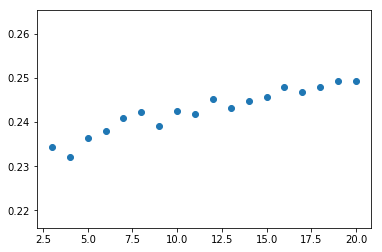

Wall time: 1min 52s


In [90]:
%%time
###uniforme
###18
print ("Comenzo bucle knn")
from sklearn.neighbors import KNeighborsClassifier

aux_dict = {}
aux_list =[]
for nume in range(3,21):
    for weights in ['uniform']:
        knn = KNeighborsClassifier(n_neighbors=nume,weights=weights)
        knn.fit(X_train_p,Y_train_p)
        aux_dict={'nume': nume, 'weights': weights, 'score':knn.score(X_test_p,Y_test_p)}
        aux_list.append(aux_dict)
        #print (str(nume)+' '+str(weights)+' '+str(knn.score(X_test,y_test))) 

print ("termino bucle knn")
aux_DataFrame=pd.DataFrame(aux_list).sort_values(by='score', ascending = False)
print (aux_DataFrame)

plt.figure()
plt.scatter(aux_DataFrame.nume, aux_DataFrame.score)
plt.show()

In [92]:
prediction = knn.predict(X_test_p)
X_test_c = X_test_p.copy()
X_test_c['real'] = Y_test_p
X_test_c['predic'] = prediction
print (X_test_c[['real','predic']])
print (X_test_c[X_test_c['real']==X_test_c['predic']][['predic']].size)
print (X_test_c[X_test_c['real']!=X_test_c['predic']][['predic']].size)
#print (X_test_c[X_test_c['predic']==0][['predic']].size)
#print (X_test_c[X_test_c['predic']==1][['predic']].size)

       real  predic
51042     4       3
18745     7       2
35243     1       2
25484     1       2
17761     1       1
2691      1       1
55483     3       2
31035     1       4
27767     6       2
530       6       1
39970     2       1
17385     3       1
40656     3       3
54499     1       2
14853     1       1
64453     6       1
23697     7       2
30334     1       1
3458      2       6
3829      5       1
59455     8       6
25563     4       1
982       1       1
4961      1       2
10213     9       6
47705     1       1
55891     6       6
47445     6       1
47947     2       3
7708      2       1
42784     4       1
38358     2       1
5979      4       3
32796     1       3
46288     7       2
1149      1       2
3277      1       1
57462     5       1
1868      1       1
35246     1       1
33812     2       3
18307     1       1
63939     1       1
13765     2       3
61220     6       2
68631     5       1
38735     1       1
58458     2       1
56126     3       1


In [40]:
X_test_c

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,EDAD,ANTIGUEDAD,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,RANG_INGRESO_Rang_ingreso_01,RANG_INGRESO_Rang_ingreso_02,RANG_INGRESO_Rang_ingreso_03,RANG_INGRESO_Rang_ingreso_04,RANG_INGRESO_Rang_ingreso_05,RANG_INGRESO_Rang_ingreso_06,RANG_INGRESO_Rang_ingreso_07,RANG_INGRESO_Rang_ingreso_08,RANG_INGRESO_Rang_ingreso_09,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Provincia,RANG_SDO_PASIVO_MENOS0_Cero,RANG_SDO_PASIVO_MENOS0_Rango_SDO_01,RANG_SDO_PASIVO_MENOS0_Rango_SDO_02,RANG_SDO_PASIVO_MENOS0_Rango_SDO_03,RANG_SDO_PASIVO_MENOS0_Rango_SDO_04,RANG_SDO_PASIVO_MENOS0_Rango_SDO_05,RANG_SDO_PASIVO_MENOS0_Rango_SDO_06,RANG_SDO_PASIVO_MENOS0_Rango_SDO_07,RANG_SDO_PASIVO_MENOS0_Rango_SDO_08,RANG_SDO_PASIVO_MENOS0_Rango_SDO_09,RANG_SDO_PASIVO_MENOS0_Rango_SDO_10,RANG_SDO_PASIVO_MENOS0_Rango_SDO_11,RANG_SDO_PASIVO_MENOS0_Rango_SDO_12,RANG_SDO_PASIVO_MENOS0_Rango_SDO_13,RANG_SDO_PASIVO_MENOS0_Rango_SDO_14,RANG_NRO_PRODUCTOS_MENOS0_Rango_01,RANG_NRO_PRODUCTOS_MENOS0_Rango_02,RANG_NRO_PRODUCTOS_MENOS0_Rango_03,RANG_NRO_PRODUCTOS_MENOS0_Rango_04,RANG_NRO_PRODUCTOS_MENOS0_Rango_05,RANG_NRO_PRODUCTOS_MENOS0_Rango_06,real,predic
51042,87100,201208,1,30.000000,4.000000,5790,6160,6520,6900,6990,7380,1,1,1,1,1,1,0,5,5,5,0,0,0,13,7,6,15,15,6,25,10,3,0,0,0,2,2,2,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18745,41846,201208,1,27.000000,7.000000,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,0,2,0,3,16,18,18,14,23,14,10,13,12,11,9,14,4,6,6,6,6,6,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35243,50579,201208,1,34.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25484,49029,201208,0,35.185702,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17761,48396,201208,0,46.000000,8.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2691,26800,201208,1,44.000000,2.854678,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,4,4,4,4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
55483,45774,201208,1,40.000000,3.000000,4990,4400,4430,4270,3990,3830,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,35,29,26,8,14,14,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31035,44290,201208,1,25.000000,4.000000,60,480,360,430,580,690,1,1,1,1,1,1,1,0,0,0,0,2,0,18,21,18,17,23,21,15,21,18,16,28,24,1,1,1,1,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27767,92782,201208,1,35.000000,3.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,6,6,6,4,4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
530,99981,201208,1,40.000000,9.000000,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6,7,5,5,7,1,1,1,1,1,1,0,0

In [49]:
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [50]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])